In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [6]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/skyservercsv/skyserver.csv


In [9]:
data = pd.read_csv("/kaggle/input/skyservercsv/skyserver.csv")

In [10]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [12]:
data.shape

(10000, 18)

In [13]:
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [14]:
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [15]:
data.shape

(10000, 16)

In [16]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [18]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

In [19]:
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


In [20]:
X = data.drop('class', axis=1)
y = data['class']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

<Axes: xlabel='class', ylabel='count'>

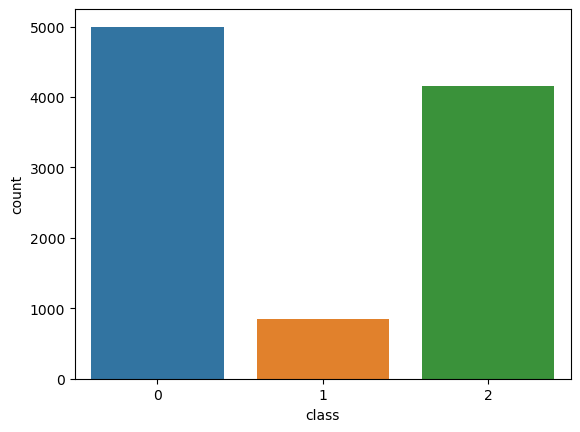

In [23]:
sns.countplot(x=data['class'])

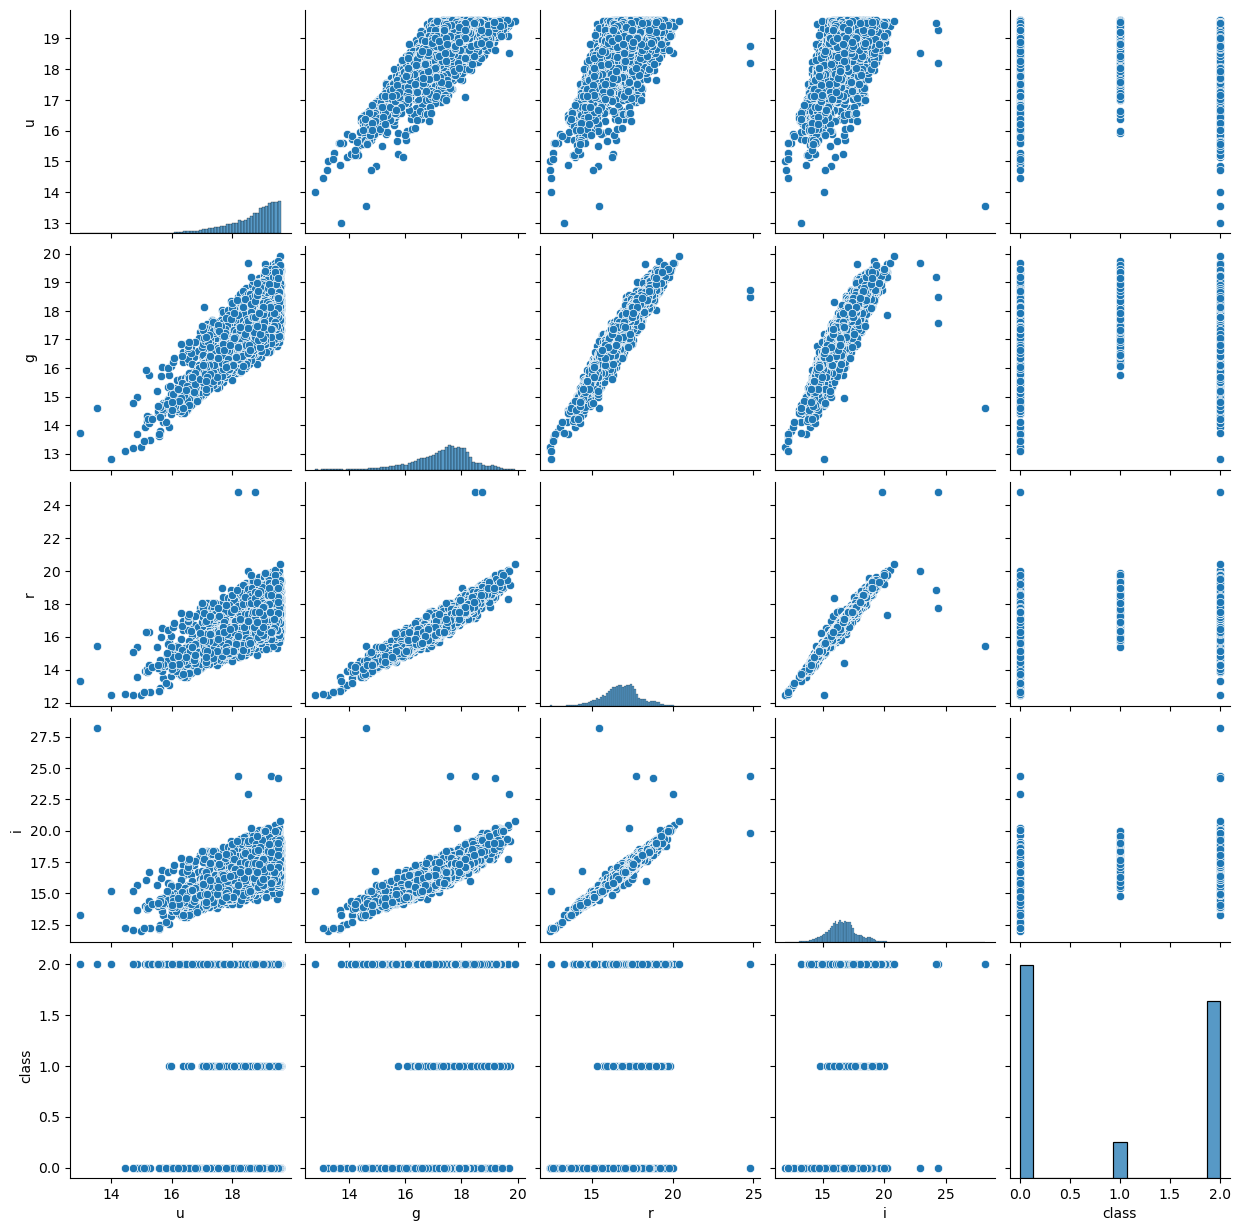

In [25]:
sns.pairplot(data[['u','g','r','i','class']])

In [27]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

In [28]:
LRClassifer = LogisticRegression()

In [29]:
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

dtClassifer.fit(X_train, y_train)

LRClassifer.fit(X_train, y_train)

NeNeClassifier.fit(X_train, y_train)
KNeighborsClassifier(n_neighbors=3)

y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [30]:
print(y_preds[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


In [31]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Linear Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.94      0.98      0.96       255
           2       1.00      1.00      1.00      1241

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000


  Linear Regression -
                 precision    recall  f1-score   support

           0       0.97      0.99      0.98      1469
           1       0.94      0.97      0.96       258
           2       0.99      0.96      0.98      1273

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.94      0.89      0.91      1575
           1       0.88      0.97      0.92       240
     

Now the assigned tasks begins
firstly calculating corelation and corelation matrix

In [39]:
corr = data.corr()

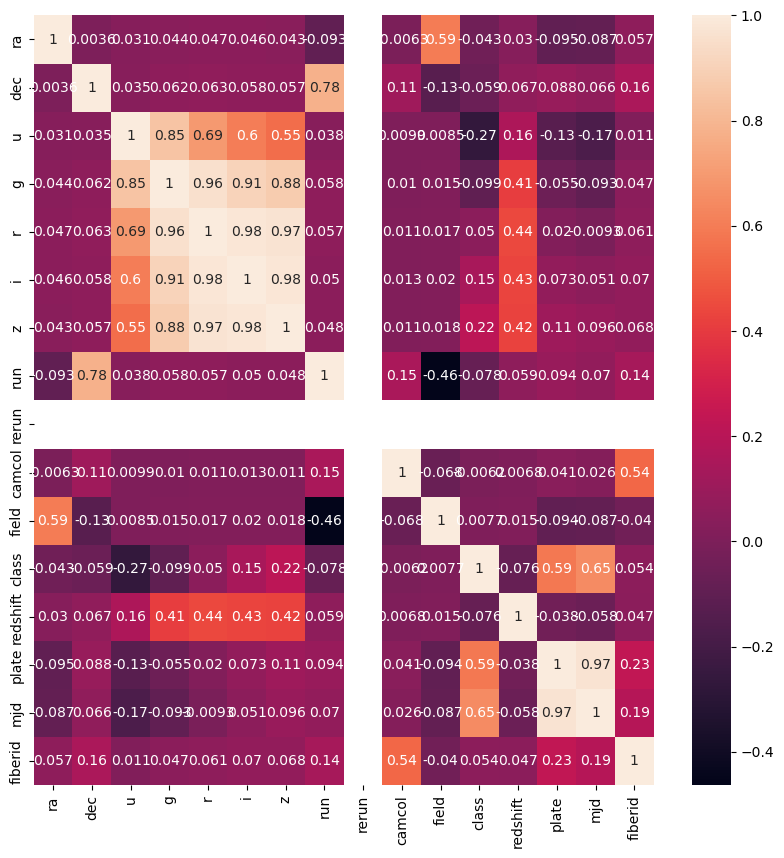

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [53]:
correlated_features = corr["class"].sort_values(ascending=False)[:5]


now secondly making a model that can predict whether the object is a star, quasar or galaxy
models I used Random Forest Classifier, SVC and Guassian

In [57]:
le=LabelEncoder()
data['class']=le.fit_transform(data['class'])

In [58]:
data['class'].unique()

array([2, 0, 1])

<Axes: title={'center': 'Different Celestical bodies'}, xlabel='class', ylabel='Density'>

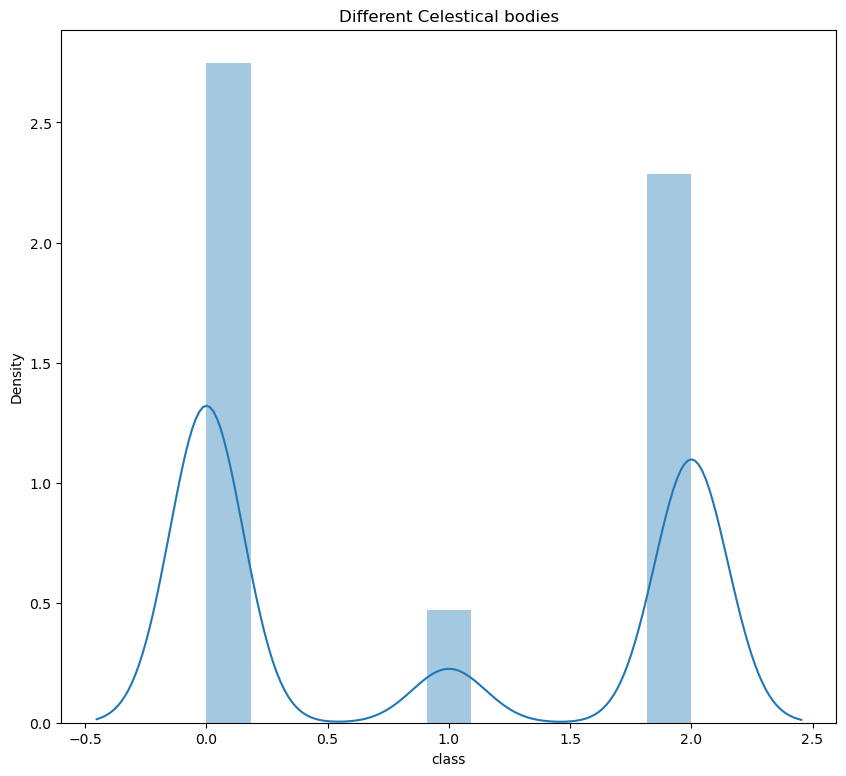

In [59]:
plt.figure(figsize=(10,9))
plt.title("Different Celestical bodies")
sns.distplot(data['class'])

In [64]:
import scipy.stats
from scipy.stats import zscore
z=np.abs(zscore(data))
z

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,0.167458,0.584923,1.031486,0.348559,0.837280,0.946058,0.995342,0.838061,NaN,0.210852,0.217630,1.138320,0.369731,1.031489,1.309311,0.668632
1,0.168862,0.583114,0.052430,0.166533,0.154155,0.082645,0.026043,0.838061,NaN,0.210852,0.217630,1.138320,0.369849,0.636213,0.879197,0.911012
2,0.170574,0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,0.838061,NaN,0.210852,0.211479,0.960739,0.053027,0.656339,0.609191,0.775279
3,0.174558,0.586501,1.030630,0.813627,0.636692,0.526604,0.430921,0.838061,NaN,0.210852,0.205328,1.138320,0.369993,1.031489,1.309311,0.760736
4,0.174825,0.584412,1.290232,1.172519,0.376762,0.025101,0.158276,0.838061,NaN,0.210852,0.205328,1.138320,0.368189,1.031489,1.309311,0.770431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.925337,1.455852,0.239453,0.104292,0.069416,0.087121,0.068876,1.331785,NaN,0.389352,0.869659,0.960739,0.298756,0.566888,0.705811,0.519029
9996,0.925553,1.461079,0.418536,0.070402,0.220993,0.116515,0.229516,1.331785,NaN,0.389352,0.863508,0.960739,0.066761,0.566888,0.705811,0.606286
9997,0.920395,1.460907,0.167538,0.429347,0.634775,0.743983,0.829211,1.331785,NaN,0.389352,0.863508,1.138320,0.370741,3.266087,2.693094,1.303667
9998,0.921973,1.464321,0.318018,0.569857,0.646764,0.682516,0.595986,1.331785,NaN,0.389352,0.857356,0.960739,0.333647,0.566888,0.705811,0.601438


In [65]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9992, 9994, 9997]), array([12, 12, 12, ..., 13, 13, 13]))


In [68]:
data_new=data[(z<3).all(axis=1)]
data_new

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid


In [71]:
data.shape

(10000, 16)

In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_curve

In [78]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred=rf.predict(X_test)
print('Accuracy Score for Random Forest is')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred)) 

Accuracy Score for Random Forest is
0.989
[[1481    7    9]
 [  16  249    1]
 [   0    0 1237]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1497
           1       0.97      0.94      0.95       266
           2       0.99      1.00      1.00      1237

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [80]:
model=[GaussianNB(),SVC()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy Score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Accuracy Score of GaussianNB() is:
0.9753333333333334
[[1461   31    5]
 [  16  249    1]
 [  11   10 1216]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1497
           1       0.86      0.94      0.90       266
           2       1.00      0.98      0.99      1237

    accuracy                           0.98      3000
   macro avg       0.95      0.97      0.95      3000
weighted avg       0.98      0.98      0.98      3000

Accuracy Score of SVC() is:
0.9533333333333334
[[1441    4   52]
 [  17  246    3]
 [  64    0 1173]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1497
           1       0.98      0.92      0.95       266
           2       0.96      0.95      0.95      1237

    accuracy                           0.95      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000

